# 11-1 Efficient Markets Hypothesis example

In [1]:
pip install wooldridge

Note: you may need to restart the kernel to use updated packages.


In [1]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

In [2]:
nyse = woo.dataWoo('nyse')
nyse

,price,return,return_1,t,price_1,price_2,cprice,cprice_1
0,49.750000,NaN,NaN,1,NaN,NaN,NaN,NaN
1,51.439999,3.396982,NaN,2,49.750000,NaN,1.689999,NaN
2,52.049999,1.185849,3.396982,3,51.439999,49.750000,0.610001,1.689999
3,52.279999,0.441882,1.185849,4,52.049999,51.439999,0.230000,0.610001
4,54.240002,3.749049,0.441882,5,52.279999,52.049999,1.960003,0.230000
...,...,...,...,...,...,...,...,...
686,161.740005,-1.106694,-1.004784,687,163.550003,165.210007,-1.809998,-1.660004
687,165.449997,2.293799,-1.106694,688,161.740005,163.550003,3.709991,-1.809998
688,166.669998,0.737384,2.293799,689,165.449997,161.740005,1.220001,3.709991
689,163.410004,-1.955958,0.737384,690,166.669998,165.449997,-3.259995,1.220001


In [3]:
nyse['ret'] =  nyse['return']

In [4]:
# add all lags up to order 3:
nyse['ret_lag1'] =  nyse['ret'].shift(1)
nyse['ret_lag2'] =  nyse['ret'].shift(2)
nyse['ret_lag3'] =  nyse['ret'].shift(3)

In [5]:
# linear regression of model with lags:
reg1 = smf.ols(formula='ret ~ ret_lag1',data=nyse)
reg2 = smf.ols(formula='ret ~ ret_lag1 + ret_lag2',data=nyse)
reg3 = smf.ols(formula='ret ~ ret_lag1 + ret_lag2 + ret_lag3',data=nyse)

results1 = reg1.fit()
results2 = reg2.fit()
results3 = reg3.fit()

In [10]:
# print regression tables:
table1 = pd.DataFrame({'b' : round(results1.params, 4),
                      'se' : round(results1.bse, 4),
                      't' : round(results1.tvalues, 4),
                      'pval' : round(results1.pvalues, 4)})
print(f'table1 : \n{table1}\n')

table2 = pd.DataFrame({'b' : round(results2.params, 4),
                      'se' : round(results2.bse, 4),
                      't' : round(results2.tvalues, 4),
                      'pval' : round(results2.pvalues, 4)})
print(f'table2 : \n{table2}\n')
      
table3 = pd.DataFrame({'b' : round(results3.params, 4),
                      'se' : round(results3.bse, 4),
                      't' : round(results3.tvalues, 4),
                      'pval' : round(results3.pvalues, 4)})
print(f'table3 : \n{table3}\n')

table1 : 
                b      se       t    pval
Intercept  0.1796  0.0807  2.2248  0.0264
ret_lag1   0.0589  0.0380  1.5490  0.1218

table2 : 
                b      se       t    pval
Intercept  0.1857  0.0812  2.2889  0.0224
ret_lag1   0.0603  0.0382  1.5799  0.1146
ret_lag2  -0.0381  0.0381 -0.9982  0.3185

table3 : 
                b      se       t    pval
Intercept  0.1794  0.0816  2.1990  0.0282
ret_lag1   0.0614  0.0382  1.6056  0.1088
ret_lag2  -0.0403  0.0383 -1.0519  0.2932
ret_lag3   0.0307  0.0382  0.8038  0.4218



### 2) Apple inc의 2008-2016 daily stock returns plot 그리기

In [12]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [13]:
# download data for AAPL and define start and end:
tickers = ['AAPL']
start_date ='2007-12-31'
end_date ='2016-12-31'

In [19]:
# use pandas_datareader for the import:
AAPL_data = pdr.data.DataReader(tickers,'yahoo',start_date,end_date)
AAPL_data

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2007-12-31,6.048641,7.074286,7.160714,7.062500,7.125000,5.393332e+08
2008-01-02,5.949704,6.958571,7.152143,6.876786,7.116786,1.079179e+09
2008-01-03,5.952452,6.961786,7.049643,6.881786,6.978929,8.420664e+08
2008-01-04,5.498072,6.430357,6.892857,6.388929,6.837500,1.455832e+09
2008-01-07,5.424477,6.344286,6.557143,6.079643,6.473214,2.072193e+09
...,...,...,...,...,...,...
2016-12-23,27.344473,29.129999,29.129999,28.897499,28.897499,5.699800e+07
2016-12-27,27.518133,29.315001,29.450001,29.122499,29.129999,7.318760e+07


In [20]:
# drop ticker symbol
AAPL_data.columns = AAPL_data.columns.droplevel(level=1)
AAPL_data

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2007-12-31,6.048641,7.074286,7.160714,7.062500,7.125000,5.393332e+08
2008-01-02,5.949704,6.958571,7.152143,6.876786,7.116786,1.079179e+09
2008-01-03,5.952452,6.961786,7.049643,6.881786,6.978929,8.420664e+08
2008-01-04,5.498072,6.430357,6.892857,6.388929,6.837500,1.455832e+09
2008-01-07,5.424477,6.344286,6.557143,6.079643,6.473214,2.072193e+09
...,...,...,...,...,...,...
2016-12-23,27.344473,29.129999,29.129999,28.897499,28.897499,5.699800e+07
2016-12-27,27.518133,29.315001,29.450001,29.122499,29.129999,7.318760e+07
2016-12-28,27.400797,29.190001,29.504999,29.049999,29.379999,8.362360e+07


In [22]:
# calculate return as the log difference :
AAPL_data['ret'] = np.log(AAPL_data['Adj Close']).diff()
AAPL_data

Attributes,Adj Close,Close,High,Low,Open,Volume,ret
Date,,,,,,,
2007-12-31,6.048641,7.074286,7.160714,7.062500,7.125000,5.393332e+08,NaN
2008-01-02,5.949704,6.958571,7.152143,6.876786,7.116786,1.079179e+09,-0.016492
2008-01-03,5.952452,6.961786,7.049643,6.881786,6.978929,8.420664e+08,0.000462
2008-01-04,5.498072,6.430357,6.892857,6.388929,6.837500,1.455832e+09,-0.079406
2008-01-07,5.424477,6.344286,6.557143,6.079643,6.473214,2.072193e+09,-0.013476
...,...,...,...,...,...,...,...
2016-12-23,27.344473,29.129999,29.129999,28.897499,28.897499,5.699800e+07,0.001976
2016-12-27,27.518133,29.315001,29.450001,29.122499,29.129999,7.318760e+07,0.006331
2016-12-28,27.400797,29.190001,29.504999,29.049999,29.379999,8.362360e+07,-0.004273


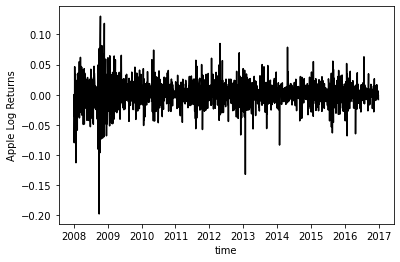

In [25]:
# time series plot
plt.plot('ret', data=AAPL_data, color='black')
plt.ylabel('Apple Log Returns')
plt.xlabel('time')
plt.show()

In [26]:
# linear regresstion 하는 방법은 11-2 1) 방법 동일

# 11-2 nature of highly persistent time series

## 1) randomwalk

In [27]:
# set the random seed :
np.random.seed(1234567)

(0.0, 50.0)

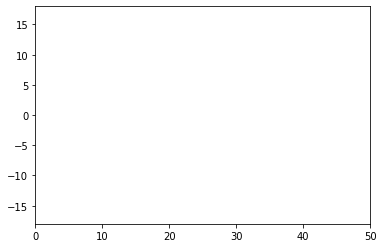

In [28]:
# initialize plot:
x_range = np.linspace(0,50,num=51)
plt.ylim([-18,18])
plt.xlim([0,50])

In [30]:
import scipy.stats as stats

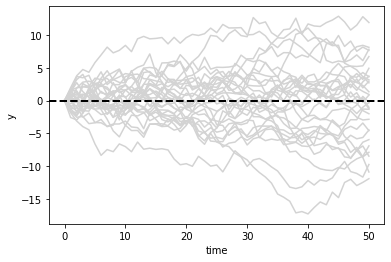

In [32]:
# loop over draws:
for r in range(0,30):
    # iid standard normal shock:
    c = stats.norm.rvs(0,1,size=51)
    
    # set first entry to 0 (y_0=0)
    c[0]=0
    
    # random walk as cumulative sum of shcoks
    y = np.cumsum(c)
    
    # add line to graph
    plt.plot(x_range, y, color='lightgrey')
    
plt.axhline(linewidth=2, linestyle='--',color='black')
plt.ylabel('y')
plt.xlabel('time')
plt.show()

## 2) randomwalk with drift

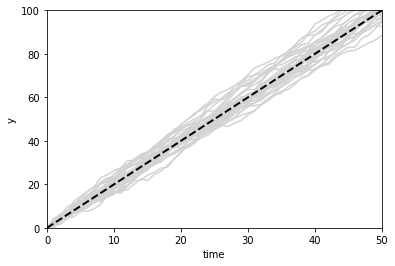

In [33]:
# set the random seed :
np.random.seed(1234567)

# initialize plot:
x_range = np.linspace(0,50,num=51)
plt.ylim([0,100])
plt.xlim([0,50])

# loop over draws:
for r in range(0,30):
    # iid standard normal shock:
    c = stats.norm.rvs(0,1,size=51)
    
    # set first entry to 0 (y_0=0)
    c[0]=0
    
    # random walk as cumulative sum of shcoks
    y = np.cumsum(c) + 2 * x_range
    
    # add line to graph
    plt.plot(x_range, y, color='lightgrey')
    
plt.plot(x_range, 2 * x_range, linewidth=2, linestyle='--',color='black')
plt.ylabel('y')
plt.xlabel('time')
plt.show()

# 11-3) Differences of highly persistent time series

## 1) randomwalk with drift, and diff

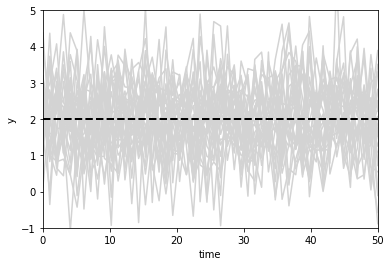

In [35]:
# set the random seed :
np.random.seed(1234567)

# initialize plot:
x_range = np.linspace(0,50,num=50)
plt.ylim([-1,5])
plt.xlim([0,50])

# loop over draws:
for r in range(0,30):
    # iid standard normal shock:
    c = stats.norm.rvs(0,1,size=51)
    
    # set first entry to 0 (y_0=0)
    c[0]=0
    
    # random walk as cumulative sum of shcoks
    y = np.cumsum(2 +c)
    
    # first difference
    Dy = y[1:51] - y[0:50]
    
    # add line to graph
    plt.plot(x_range, Dy, color='lightgrey')
    
plt.axhline(y=2, linewidth=2, linestyle='--',color='black')
plt.ylabel('y')
plt.xlabel('time')
plt.show()

# 11-4. regression with first differences

In [42]:
fertil3 = woo.dataWoo('fertil3')
T = len(fertil3)

In [43]:
fertil3

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
0,124.699997,0.000000,1913,1,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126.599998,0.000000,1914,2,4,0.000000,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,124.699997,NaN,NaN,NaN,NaN,NaN
2,125.000000,0.000000,1915,3,9,0.000000,0.000000,NaN,NaN,0,...,0.000000,NaN,NaN,NaN,126.599998,1.900002,NaN,NaN,NaN,124.699997
3,123.400002,0.000000,1916,4,16,0.000000,0.000000,0.000000,NaN,0,...,0.000000,0.000000,NaN,NaN,125.000000,-1.599998,1.900002,NaN,NaN,126.599998
4,121.000000,19.270000,1917,5,25,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,NaN,123.400002,-1.599998,-1.599998,1.900002,NaN,125.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68.400002,123.169998,1980,68,4624,132.929993,118.980003,116.110001,120.080002,1,...,13.949989,2.870003,-3.970001,-2.279999,67.199997,1.699997,-1.300003,1.000000,-0.199997,65.500000
68,67.400002,119.309998,1981,69,4761,123.169998,132.929993,118.980003,116.110001,1,...,-9.759995,13.949989,2.870003,-3.970001,68.400002,1.200005,1.699997,-1.300003,1.000000,67.199997
69,67.300003,102.040001,1982,70,4900,119.309998,123.169998,132.929993,118.980003,1,...,-3.860001,-9.759995,13.949989,2.870003,67.400002,-1.000000,1.200005,1.699997,-1.300003,68.400002
70,65.800003,92.489998,1983,71,5041,102.040001,119.309998,123.169998,132.929993,1,...,-17.269997,-3.860001,-9.759995,13.949989,67.300003,-0.099998,-1.000000,1.200005,1.699997,67.400002


In [44]:
# define time series - yearly(1913~)
fertil3.index = pd.date_range(start='1913',periods=T,freq='Y').year

In [45]:
fertil3

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
1913,124.699997,0.000000,1913,1,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914,126.599998,0.000000,1914,2,4,0.000000,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,124.699997,NaN,NaN,NaN,NaN,NaN
1915,125.000000,0.000000,1915,3,9,0.000000,0.000000,NaN,NaN,0,...,0.000000,NaN,NaN,NaN,126.599998,1.900002,NaN,NaN,NaN,124.699997
1916,123.400002,0.000000,1916,4,16,0.000000,0.000000,0.000000,NaN,0,...,0.000000,0.000000,NaN,NaN,125.000000,-1.599998,1.900002,NaN,NaN,126.599998
1917,121.000000,19.270000,1917,5,25,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,NaN,123.400002,-1.599998,-1.599998,1.900002,NaN,125.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,68.400002,123.169998,1980,68,4624,132.929993,118.980003,116.110001,120.080002,1,...,13.949989,2.870003,-3.970001,-2.279999,67.199997,1.699997,-1.300003,1.000000,-0.199997,65.500000
1981,67.400002,119.309998,1981,69,4761,123.169998,132.929993,118.980003,116.110001,1,...,-9.759995,13.949989,2.870003,-3.970001,68.400002,1.200005,1.699997,-1.300003,1.000000,67.199997
1982,67.300003,102.040001,1982,70,4900,119.309998,123.169998,132.929993,118.980003,1,...,-3.860001,-9.759995,13.949989,2.870003,67.400002,-1.000000,1.200005,1.699997,-1.300003,68.400002
1983,65.800003,92.489998,1983,71,5041,102.040001,119.309998,123.169998,132.929993,1,...,-17.269997,-3.860001,-9.759995,13.949989,67.300003,-0.099998,-1.000000,1.200005,1.699997,67.400002


In [47]:
# compute first differnces:
## gfr : general ferility rate
## pe : personal exemption
fertil3['gfr_diff1'] = fertil3['gfr'].diff()
fertil3['pe_diff1'] = fertil3['pe'].diff()
print(f'feril3.head(): \n{fertil3.head()}\n')

feril3.head(): 
             gfr     pe  year  t  tsq  pe_1  pe_2  pe_3  pe_4  pill  ...  \
1913  124.699997   0.00  1913  1    1   NaN   NaN   NaN   NaN     0  ...   
1914  126.599998   0.00  1914  2    4   0.0   NaN   NaN   NaN     0  ...   
1915  125.000000   0.00  1915  3    9   0.0   0.0   NaN   NaN     0  ...   
1916  123.400002   0.00  1916  4   16   0.0   0.0   0.0   NaN     0  ...   
1917  121.000000  19.27  1917  5   25   0.0   0.0   0.0   0.0     0  ...   

      cpe_3  cpe_4       gfr_1    cgfr_1    cgfr_2    cgfr_3  cgfr_4  \
1913    NaN    NaN         NaN       NaN       NaN       NaN     NaN   
1914    NaN    NaN  124.699997       NaN       NaN       NaN     NaN   
1915    NaN    NaN  126.599998  1.900002       NaN       NaN     NaN   
1916    NaN    NaN  125.000000 -1.599998  1.900002       NaN     NaN   
1917    0.0    NaN  123.400002 -1.599998 -1.599998  1.900002     NaN   

           gfr_2  gfr_diff1  pe_diff1  
1913         NaN        NaN       NaN  
1914         N

In [51]:
# linear regression of model with first differences : 
reg1 = smf.ols(formula='gfr_diff1 ~ pe_diff1', data=fertil3)
result1 = reg1.fit()

In [55]:
# print regression table
table1 = pd.DataFrame({'b' : round(result1.params, 4),
                      'se' : round(result1.bse, 4),
                      't' : round(result1.tvalues, 4),
                      'pval' : round(result1.pvalues, 4)})
print(f'table1 : \n{table1}\n')

table1 : 
                b      se       t    pval
Intercept -0.7848  0.5020 -1.5632  0.1226
pe_diff1  -0.0427  0.0284 -1.5045  0.1370



pe_diff1와 gfr_diff1는 반비례, 5% 신뢰구간에서 pvalue=0에 가깝지만, 인적공제가 성장률과 -관계라는 건 이해되지 않음 -> two lag model

In [56]:
# linear regression or model with lagged diffences : 
fertil3['pe_diff1_lag1'] =  fertil3['pe_diff1'].shift(1)
fertil3['pe_diff1_lag2'] =  fertil3['pe_diff1'].shift(2)

reg2 = smf.ols(formula='gfr_diff1 ~ pe_diff1 + pe_diff1_lag1 + pe_diff1_lag2', data=fertil3)
result2 = reg2.fit()

In [57]:
# print regression table
table2 = pd.DataFrame({'b' : round(result2.params, 4),
                      'se' : round(result2.bse, 4),
                      't' : round(result2.tvalues, 4),
                      'pval' : round(result2.pvalues, 4)})
print(f'table2 : \n{table2}\n')

table2 : 
                    b      se       t    pval
Intercept     -0.9637  0.4678 -2.0602  0.0434
pe_diff1      -0.0362  0.0268 -1.3522  0.1810
pe_diff1_lag1 -0.0140  0.0276 -0.5070  0.6139
pe_diff1_lag2  0.1100  0.0269  4.0919  0.0001



pe_diff1와 pe_diff1_lag1는 여전히 -관계이지만, pe_diff1와 pe_diff1_lag1의 공동 pvalue가 0.28인걸로 보면, 통계적으로 유의하지 않은 변수, 여기서는 pe_diff1_lag2와 gfr_diff1 간의 양의 관계가 존재한다는 것에 주목해라